<a href="https://colab.research.google.com/github/KindOrca/Section_1_Project/blob/main/LOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.leagueoflegends.com/ko-kr/how-to-play/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

file = files.upload()

Saving Challenger_Ranked_Games_15minute.csv to Challenger_Ranked_Games_15minute (1).csv


In [ ]:
df = pd.read_csv('Challenger_Ranked_Games_15minute.csv')

In [ ]:
df.columns

Index(['gameId', 'blueWins', 'blueTotalGolds', 'blueCurrentGolds',
       'blueTotalLevel', 'blueAvgLevel', 'blueTotalMinionKills',
       'blueTotalJungleMinionKills', 'blueFirstBlood', 'blueKill', 'blueDeath',
       'blueAssist', 'blueWardPlaced', 'blueWardKills', 'blueFirstTower',
       'blueFirstInhibitor', 'blueFirstTowerLane', 'blueTowerKills',
       'blueMidTowerKills', 'blueTopTowerKills', 'blueBotTowerKills',
       'blueInhibitor', 'blueFirstDragon', 'blueDragnoType', 'blueDragon',
       'blueRiftHeralds', 'redWins', 'redTotalGolds', 'redCurrentGolds',
       'redTotalLevel', 'redAvgLevel', 'redTotalMinionKills',
       'redTotalJungleMinionKills', 'redFirstBlood', 'redKill', 'redDeath',
       'redAssist', 'redWardPlaced', 'redWardKills', 'redFirstTower',
       'redFirstInhibitor', 'redFirstTowerLane', 'redTowerKills',
       'redMidTowerKills', 'redTopTowerKills', 'redBotTowerKills',
       'redInhibitor', 'redFirstDragon', 'redDragnoType', 'redDragon',
       'redRift

In [ ]:
df.drop(columns=['gameId','blueDragnoType','redDragnoType', 'blueFirstBlood',
                 'redFirstBlood', 'blueAvgLevel', 'redAvgLevel',
                 'blueMidTowerKills','blueTopTowerKills','blueBotTowerKills',
                 'redMidTowerKills','redTopTowerKills', 'redBotTowerKills',
                 'blueCurrentGolds','redCurrentGolds'], inplace = True)

In [ ]:
df.drop_duplicates()

,blueWins,blueTotalGolds,blueTotalLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueKill,blueDeath,blueAssist,blueWardPlaced,blueWardKills,...,redWardPlaced,redWardKills,redFirstTower,redFirstInhibitor,redFirstTowerLane,redTowerKills,redInhibitor,redFirstDragon,redDragon,redRiftHeralds
0,0,24081,44,309,74,8,14,14,29,8,...,31,12,1,0,['MID_LANE'],2,0,1,2,1
1,1,24162,46,393,64,5,6,5,31,6,...,26,11,1,0,['TOP_LANE'],1,0,0,0,0
2,0,22413,41,300,62,5,20,8,28,7,...,39,9,1,0,['BOT_LANE'],4,0,1,2,1
3,0,23837,46,370,96,6,13,9,108,9,...,26,13,1,0,['TOP_LANE'],1,0,0,0,1
4,1,27688,44,381,66,9,10,10,36,11,...,41,9,1,0,['BOT_LANE'],2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26829,0,26110,46,289,73,15,14,25,38,9,...,30,11,1,0,['BOT_LANE'],1,0,1,1,1
26830,0,57503,62,329,28,27,37,33,36,2,...,41,0,0,1,[],6,1,0,0,0
26831,0,26091,47,338,86,7,6,8,40,12,...,80,8,0,0,[],0,0,0,0,0
26832,1,24734,45,328,64,11,7,20,33,10,...,31,13,1,0,['BOT_LANE'],1,0,0,1,0


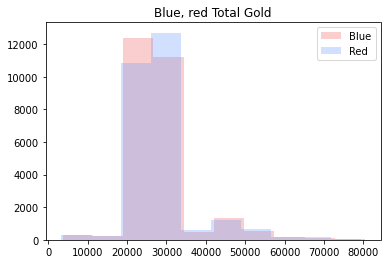

In [ ]:
plt.hist(df['blueTotalGolds'], label = 'Blue', alpha = 0.3)
plt.hist(df['redTotalGolds'], label = 'Red', alpha = 0.3)
plt.title('Blue, red Total Gold')
plt.legend()
plt.show;

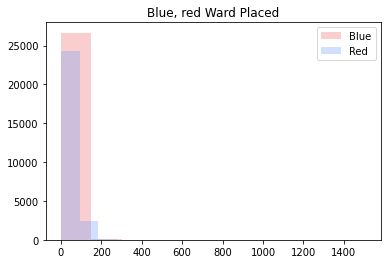

In [ ]:
plt.hist(df['blueWardPlaced'],label = 'Blue', alpha = 0.3)
plt.hist(df['redWardPlaced'], label = 'Red', alpha = 0.3)
plt.title('Blue, red Ward Placed')
plt.legend()
plt.show;

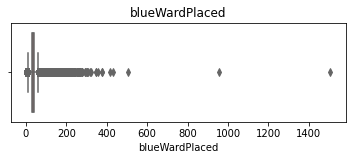

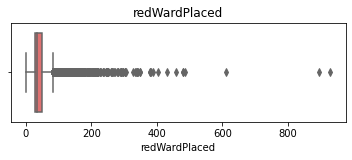

In [ ]:
plt.subplot(211)
sns.boxplot(x= 'blueWardPlaced', data = df)
plt.title('blueWardPlaced')
plt.show();

plt.subplot(212)
sns.boxplot(x= 'redWardPlaced', data = df)
plt.title('redWardPlaced')
plt.show();

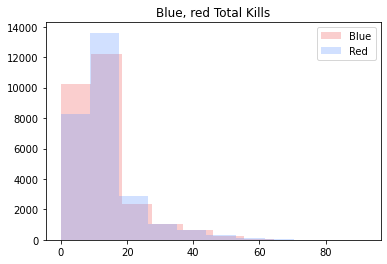

In [ ]:
plt.hist(df['blueKill'], label = 'Blue', alpha = 0.3)
plt.hist(df['redKill'], label = 'Red', alpha = 0.3)
plt.title('Blue, red Total Kills')
plt.legend()
plt.show;

In [ ]:
# 이상치 제거

# 조기 서렌
earlysurren = df[(df['blueTotalMinionKills'] < 100) | (df['redTotalMinionKills'] < 100)].index
df.drop(earlysurren, inplace = True)

# 용 이상치
df['sum_dragon'] = df['blueDragon'] + df['redDragon']
oddnum = df[df['sum_dragon'] >= 4].index
df.drop(oddnum, inplace = True)
df.drop(columns = 'sum_dragon', inplace = True)

# 골드 이상치
oddGold = df[(df['blueTotalGolds'] > 40000) | (df['redTotalGolds'] > 40000)].index
df.drop(oddGold, inplace = True)

# 와드 이상치
oddWard = df[(df['blueWardPlaced'] > 150) | (df['redWardPlaced'] > 150)].index
zeroWard = df[(df['blueWardPlaced'] == 0) | (df['redWardPlaced'] == 0)].index
df.drop(oddWard, inplace = True)
df.drop(zeroWard, inplace = True)

# 킬 이상치
oddKill = df[(df['blueKill'] > 35) | (df['redKill'] > 35)].index
df.drop(oddKill, inplace = True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
blueWins,23751.0,0.500316,0.500010,0.0,0.0,1.0,1.0,1.0
blueTotalGolds,23751.0,26707.745863,3143.764345,10321.0,24651.5,26517.0,28636.5,39934.0
blueTotalLevel,23751.0,45.971538,2.758373,21.0,45.0,46.0,48.0,68.0
blueTotalMinionKills,23751.0,349.441708,41.244761,101.0,328.0,354.0,376.0,463.0
blueTotalJungleMinionKills,23751.0,78.569913,15.832223,0.0,68.0,78.0,88.0,149.0
blueKill,23751.0,11.137931,5.023139,0.0,7.5,11.0,14.0,35.0
blueDeath,23751.0,11.136500,5.003028,0.0,8.0,11.0,14.0,34.0
blueAssist,23751.0,13.820555,7.272296,0.0,8.0,13.0,18.0,76.0
blueWardPlaced,23751.0,38.999074,17.362214,4.0,29.0,33.0,42.0,150.0
blueWardKills,23751.0,9.806661,4.103001,0.0,7.0,10.0,12.0,47.0


In [ ]:
# Data leakage를 위해 gold 특성 제거
df.drop(columns = ['blueTotalGolds','redTotalGolds'], inplace = True)

In [ ]:
# Data Wrangling

# 타워 타입 정리
tower = {'[\'TOP_LANE\']':'TOP',
         '[\'MID_LANE\']':'MID',
         '[\'BOT_LANE\']':'BOT',
         '[]': '-'}

df['blueFirstTowerLane'].replace(tower, inplace = True)
df['redFirstTowerLane'].replace(tower, inplace = True)

In [ ]:
df['TeamWins'] = df['blueWins'].replace({1:'Blue',0:'Red'})

In [ ]:
df.reset_index(drop = True, inplace = True)
df

,blueWins,blueTotalLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueKill,blueDeath,blueAssist,blueWardPlaced,blueWardKills,blueFirstTower,...,redWardKills,redFirstTower,redFirstInhibitor,redFirstTowerLane,redTowerKills,redInhibitor,redFirstDragon,redDragon,redRiftHeralds,TeamWins
0,0,44,309,74,8,14,14,29,8,0,...,12,1,0,MID,2,0,1,2,1,Red
1,1,46,393,64,5,6,5,31,6,0,...,11,1,0,TOP,1,0,0,0,0,Blue
2,0,41,300,62,5,20,8,28,7,0,...,9,1,0,BOT,4,0,1,2,1,Red
3,0,46,370,96,6,13,9,108,9,0,...,13,1,0,TOP,1,0,0,0,1,Red
4,1,44,381,66,9,10,10,36,11,0,...,9,1,0,BOT,2,0,0,0,0,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23746,1,49,403,96,17,14,9,31,12,1,...,4,0,0,-,0,0,0,0,1,Blue
23747,0,46,289,73,15,14,25,38,9,0,...,11,1,0,BOT,1,0,1,1,1,Red
23748,0,47,338,86,7,6,8,40,12,1,...,8,0,0,-,0,0,0,0,0,Red
23749,1,45,328,64,11,7,20,33,10,0,...,13,1,0,BOT,1,0,0,1,0,Blue


In [ ]:
# 가설 

# 롤에서 팀의 승리에 가장 큰 영향을 주는 특성은 킬,데스를 제외하고 첫 용이다.
target = 'TeamWins'
# Target이 Blue, Red 2개로 나뉘어져 있으므로 분류 문제로 설정

In [ ]:
df.columns

Index(['blueWins', 'blueTotalLevel', 'blueTotalMinionKills',
       'blueTotalJungleMinionKills', 'blueKill', 'blueDeath', 'blueAssist',
       'blueWardPlaced', 'blueWardKills', 'blueFirstTower',
       'blueFirstInhibitor', 'blueFirstTowerLane', 'blueTowerKills',
       'blueInhibitor', 'blueFirstDragon', 'blueDragon', 'blueRiftHeralds',
       'redWins', 'redTotalLevel', 'redTotalMinionKills',
       'redTotalJungleMinionKills', 'redKill', 'redDeath', 'redAssist',
       'redWardPlaced', 'redWardKills', 'redFirstTower', 'redFirstInhibitor',
       'redFirstTowerLane', 'redTowerKills', 'redInhibitor', 'redFirstDragon',
       'redDragon', 'redRiftHeralds', 'TeamWins'],
      dtype='object')

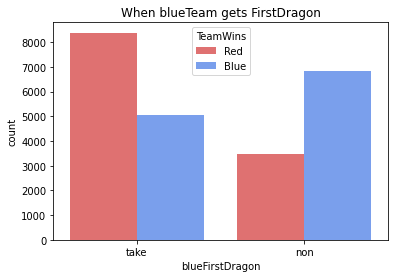

In [ ]:
sns.set_palette(['#F15F5F','#6799FF'])
sns.countplot(x='blueFirstDragon', hue = 'TeamWins', data = df).set_xticklabels(['take','non'])
plt.title('When blueTeam gets FirstDragon');

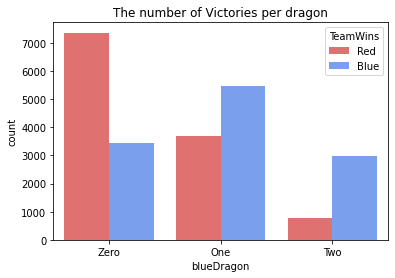

In [ ]:
sns.countplot(x='blueDragon', hue = 'TeamWins', data = df).set_xticklabels(['Zero', 'One', 'Two'])
plt.title('The number of Victories per dragon');

In [ ]:
df.drop(columns = ['blueWins', 'redWins'], inplace = True)

In [ ]:
# Part 2
# 모델 학습 및 검증
 # 모델링 이전에 미리 baseline 모델을 선정하였다.
 # 문제 정의에서 언급한 회귀 / 분류 문제에 맞는 모델을 선택하였다.
 # 회귀/분류 문제에 따른 적절한 평가지표를 선택하였다.
 # 교차검증이나 hold-out을 사용해 데이터셋을 분리하고 모델의 일반화 성능을 검증하였다.
 # 모델 최적화를 위한 하이퍼파라미터 튜닝을 진행하였다.

# 모델 해석
 # 모델 결과로서 Test Score를 제시하여 모델을 평가하였다.
 # PDP/SHAP/FeatureImportance 등을 활용하여 모델 작동을 설명하였다.
 # 모델 학습 결과에 대한 해석이 드러나 있다. (가설 해소 혹은 문제 해결 등)

In [ ]:
# 모델 학습
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.80, test_size=0.20, random_state=2)

train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=2)
# 제 기준에서 게임 데이터 20000개이면 훈련세트 크기가 충분히 크다고 생각하여 굳이 교차검정까지는 안해도 된다고
# 판단하였습니다.

X_train = train.drop(columns = target)
y_train = train[target]
X_val = val.drop(columns = target)
y_val = val[target]
X_test = test.drop(columns = target)
y_test = test[target]

In [ ]:
# Target = 'TeamWins'
# base model은 target특성의 최빈값으로 설정
mode = df['TeamWins'].mode()[0]
BaseModel = [mode] * len(test)

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.dtypes

blueTotalLevel                 int64
blueTotalMinionKills           int64
blueTotalJungleMinionKills     int64
blueKill                       int64
blueDeath                      int64
blueAssist                     int64
blueWardPlaced                 int64
blueWardKills                  int64
blueFirstTower                 int64
blueFirstInhibitor             int64
blueFirstTowerLane            object
blueTowerKills                 int64
blueInhibitor                  int64
blueFirstDragon                int64
blueDragon                     int64
blueRiftHeralds                int64
redTotalLevel                  int64
redTotalMinionKills            int64
redTotalJungleMinionKills      int64
redKill                        int64
redDeath                       int64
redAssist                      int64
redWardPlaced                  int64
redWardKills                   int64
redFirstTower                  int64
redFirstInhibitor              int64
redFirstTowerLane             object
r

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)
pipe.fit(X_train, y_train)

print('검증세트 정확도', pipe.score(X_val, y_val))

검증세트 정확도 0.7984210526315789


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
y_test_pred = pipe.predict(X_test)
print('F1:',f1_score(y_test, y_test_pred, pos_label = 'Blue'))

F1: 0.7934224049331964


In [ ]:
# Hyper Parameter 튜닝
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=2)
)

dists = {
    'randomforestclassifier__max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'randomforestclassifier__max_features' : [1,2,3,4,5],
    'randomforestclassifier__n_estimators' : [100,110,120,130,140,150]
}

# RandomizedSearchCV 작성
clf1= RandomizedSearchCV(
    pipe,
    param_distributions=dists, # 파라미터 입력
    n_iter = 10,               # random search 탐색 횟수
    cv = 5,                    # cv 검증을 위한 분할 검증 횟수
    scoring='accuracy',        # 오차 평가방법
    random_state = 10
  ) 

clf1.fit(X_train, y_train)               # ??????????????????????????????????/////

ValueError: ignored

In [ ]:
from sklearn import metrics

# max_depth
for i in range(1, 10):
  pipe1 = make_pipeline(
      OrdinalEncoder(), 
      SimpleImputer(), 
      StandardScaler(), 
      RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, max_depth = i)
      )
  pipe1.fit(X_train, y_train)
  predict = pipe1.predict(X_val)
  y_test_pred = pipe1.predict(X_test)
  print('RF max_depth =',i,'의 예측 정확도는', round(metrics.accuracy_score(y_val, predict),3))
  print('F1:',f1_score(y_test, y_test_pred, pos_label = 'Blue'))

RF max_depth = 1 의 예측 정확도는 0.769
F1: 0.7747636662556514
RF max_depth = 2 의 예측 정확도는 0.784
F1: 0.7768285059387372
RF max_depth = 3 의 예측 정확도는 0.788
F1: 0.7841355091923157
RF max_depth = 4 의 예측 정확도는 0.789
F1: 0.7866887143447705
RF max_depth = 5 의 예측 정확도는 0.796
F1: 0.791976840363937
RF max_depth = 6 의 예측 정확도는 0.798
F1: 0.7895063003511671
RF max_depth = 7 의 예측 정확도는 0.794
F1: 0.791838417147568
RF max_depth = 8 의 예측 정확도는 0.8
F1: 0.7903525046382189
RF max_depth = 9 의 예측 정확도는 0.8
F1: 0.7905252317198763


In [ ]:
#  max_depth = 5

In [ ]:
# n_estimators
for i in range(10, 200, 10):
  pipe1 = make_pipeline(
      OrdinalEncoder(), 
      SimpleImputer(), 
      StandardScaler(), 
      RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, max_depth = 5, n_estimators = i)
      )
  pipe1.fit(X_train, y_train)
  predict = pipe1.predict(X_val)
  print('RF n_estimators =',i,'의 예측 정확도는', round(metrics.accuracy_score(y_val, predict),3))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RF n_estimators = 10 의 예측 정확도는 0.792


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RF n_estimators = 20 의 예측 정확도는 0.794
RF n_estimators = 30 의 예측 정확도는 0.792
RF n_estimators = 40 의 예측 정확도는 0.794
RF n_estimators = 50 의 예측 정확도는 0.794
RF n_estimators = 60 의 예측 정확도는 0.791
RF n_estimators = 70 의 예측 정확도는 0.792
RF n_estimators = 80 의 예측 정확도는 0.794
RF n_estimators = 90 의 예측 정확도는 0.795
RF n_estimators = 100 의 예측 정확도는 0.796
RF n_estimators = 110 의 예측 정확도는 0.796
RF n_estimators = 120 의 예측 정확도는 0.795
RF n_estimators = 130 의 예측 정확도는 0.794
RF n_estimators = 140 의 예측 정확도는 0.793
RF n_estimators = 150 의 예측 정확도는 0.793
RF n_estimators = 160 의 예측 정확도는 0.793
RF n_estimators = 170 의 예측 정확도는 0.793
RF n_estimators = 180 의 예측 정확도는 0.792
RF n_estimators = 190 의 예측 정확도는 0.794


In [ ]:
# n_estimators = 105

In [ ]:
# max_features
for i in range(1, 5): 
  pipe1 = make_pipeline(
      OrdinalEncoder(), 
      SimpleImputer(), 
      StandardScaler(), 
      RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, max_depth = 5, n_estimators = 105, max_features = i)
      )
  pipe1.fit(X_train, y_train)
  predict = pipe1.predict(X_val)
  print('RF max_features =',i,'의 예측 정확도는', round(metrics.accuracy_score(y_val, predict),3))

RF max_features = 1 의 예측 정확도는 0.794
RF max_features = 2 의 예측 정확도는 0.798
RF max_features = 3 의 예측 정확도는 0.794
RF max_features = 4 의 예측 정확도는 0.793


In [ ]:
# max_features = 2

In [ ]:
# 최적 모델
pipe = make_pipeline(
      OrdinalEncoder(), 
      SimpleImputer(), 
      StandardScaler(), 
      RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, max_depth = 7, n_estimators = 111, max_features = 2)
      )

pipe.fit(X_train, y_train)

y_test_pred = pipe.predict(X_test)
print('F1:',f1_score(y_test, y_test_pred, pos_label = 'Blue'))

print('BaseModel:',f1_score(BaseModel, y_test_pred, pos_label = 'Blue'))

F1: 0.7930113052415211
BaseModel: 0.6789934658695954


In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(max_depth = 5, n_estimators = 105, max_features = 2, random_state=10, n_jobs=-1)) 
])

pipe.named_steps

{'preprocessing': Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                 ('simpleimputer', SimpleImputer())]),
 'rf': RandomForestClassifier(max_depth=5, max_features=2, n_estimators=105, n_jobs=-1,
                        random_state=10)}

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe.named_steps['rf'],
    scoring='accuracy',
    n_iter=5, 
    random_state=2
)

pipe.fit(X_train, y_train)

X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

permuter.fit(X_val_transformed, y_val);

In [ ]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

blueWardKills                -3.684211e-04
blueFirstInhibitor           -5.263158e-05
redInhibitor                  2.220446e-17
blueRiftHeralds               4.440892e-17
redFirstTower                 6.661338e-17
blueInhibitor                 5.263158e-05
redRiftHeralds                1.052632e-04
redFirstInhibitor             1.578947e-04
redWardPlaced                 1.578947e-04
blueWardPlaced                3.684211e-04
blueFirstDragon               4.210526e-04
redWardKills                  5.789474e-04
redTowerKills                 1.210526e-03
blueTotalJungleMinionKills    1.210526e-03
redFirstTowerLane             1.789474e-03
blueTotalMinionKills          1.894737e-03
blueFirstTowerLane            2.052632e-03
redTotalMinionKills           2.210526e-03
redFirstDragon                2.263158e-03
blueTowerKills                2.473684e-03
blueFirstTower                2.578947e-03
redTotalJungleMinionKills     3.368421e-03
blueAssist                    3.473684e-03
redAssist  

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0101 ± 0.0039,redTotalLevel
0.0083 ± 0.0061,blueTotalLevel
0.0073 ± 0.0027,redKill
0.0073 ± 0.0030,redDeath
0.0069 ± 0.0043,blueKill
0.0067 ± 0.0034,blueDeath
0.0063 ± 0.0031,redDragon
0.0049 ± 0.0017,blueDragon
0.0042 ± 0.0034,redAssist
0.0035 ± 0.0039,blueAssist


In [ ]:
# 결과 해석
# 게임에 승리의 가장 높은 특성을 차지하는 것은 레벨이다.
# 킬데스를 제외하고 그 다음 높은 특성은 용이지만 첫 용의 특성은 상당히 내려가 있다.
# 이것을 해석하자면 첫 용은 획득하지 않고 첫 용보다 높은 특성인 타워, 상대 정글 뺐는 것이 게임승리에 효과적이고
# 두 번째 용부터는 꾸준히 획득하는 것이 게임승리에 효과적이다.

# 첫 용이 게임승리에 직결한다는 가설은 틀렸다.